In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
df = pd.read_csv('old_working.csv', index_col='Time', parse_dates=True)
df

,Price
Time,
2021-03-27,0.1425
2021-03-28,0.1445
2021-03-29,0.1456
2021-03-30,0.1519
2021-03-31,0.1526
...,...
2021-06-20,0.1683
2021-06-21,0.1688
2021-06-22,0.1693


<Axes: xlabel='Time'>

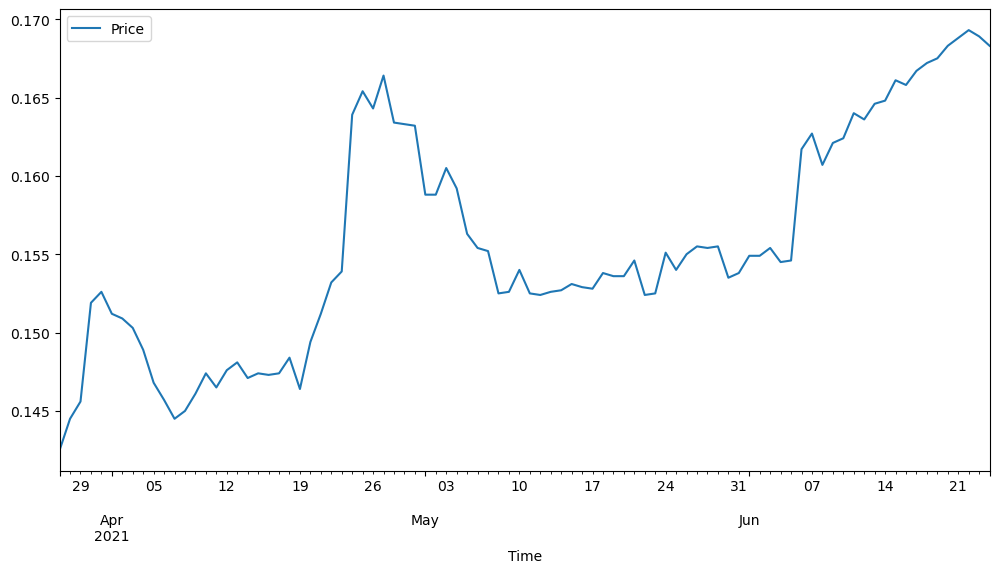

In [3]:
df.plot(figsize=(12,6))

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

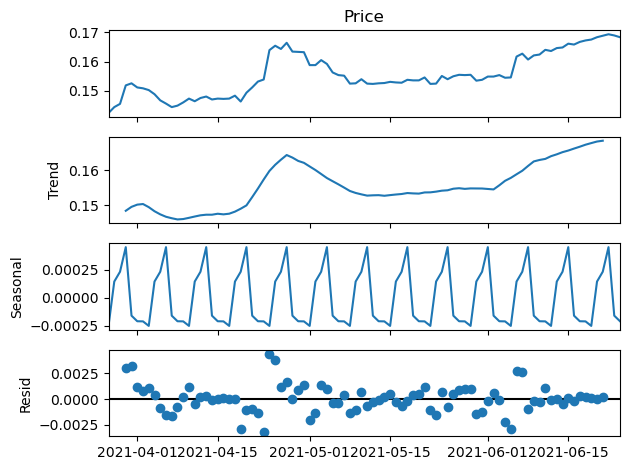

In [5]:
results = seasonal_decompose(df['Price'])
results.plot();

In [6]:
# Train and Test Split
train = df.iloc[:72]
test = df.iloc[72:]

In [7]:
# Holt-Winters Exponential Smoothing Model
# Holt-Winters Exponential Smoothing Model
model = ExponentialSmoothing(train['Price'], trend='multiplicative', seasonal='multiplicative', seasonal_periods=12, initialization_method="estimated")
fitted_model = model.fit(smoothing_level=0.9, smoothing_slope=0.05, smoothing_seasonal=0.7)


C:\Users\kilar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\kilar\AppData\Local\Temp\ipykernel_31448\693654521.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fitted_model = model.fit(smoothing_level=0.9, smoothing_slope=0.05, smoothing_seasonal=0.7)


In [8]:
# Predictions
predictions = fitted_model.forecast(steps=len(test))

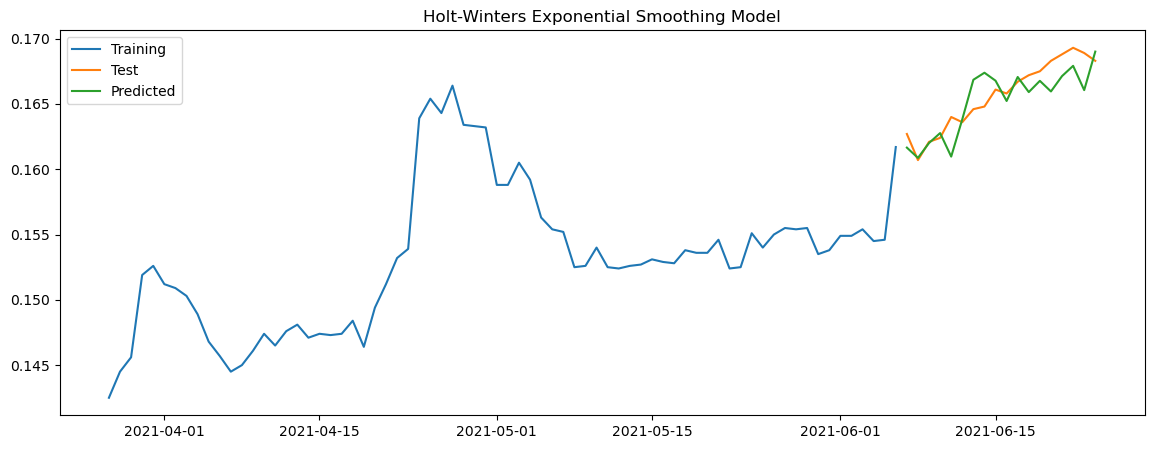

In [9]:
# Plotting
plt.figure(figsize=(14, 5))
plt.plot(train['Price'], label='Training')
plt.plot(test['Price'], label='Test')
plt.plot(predictions, label='Predicted')
plt.legend(loc="upper left")
plt.title('Holt-Winters Exponential Smoothing Model')
plt.show()


In [10]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
rmse = sqrt(mean_squared_error(test['Price'], predictions))
print("RMSE:", rmse)

RMSE: 0.0015669540550866253


In [11]:
r2 = r2_score(test['Price'], predictions)
print("R^2:", r2)

R^2: 0.6320797952661217


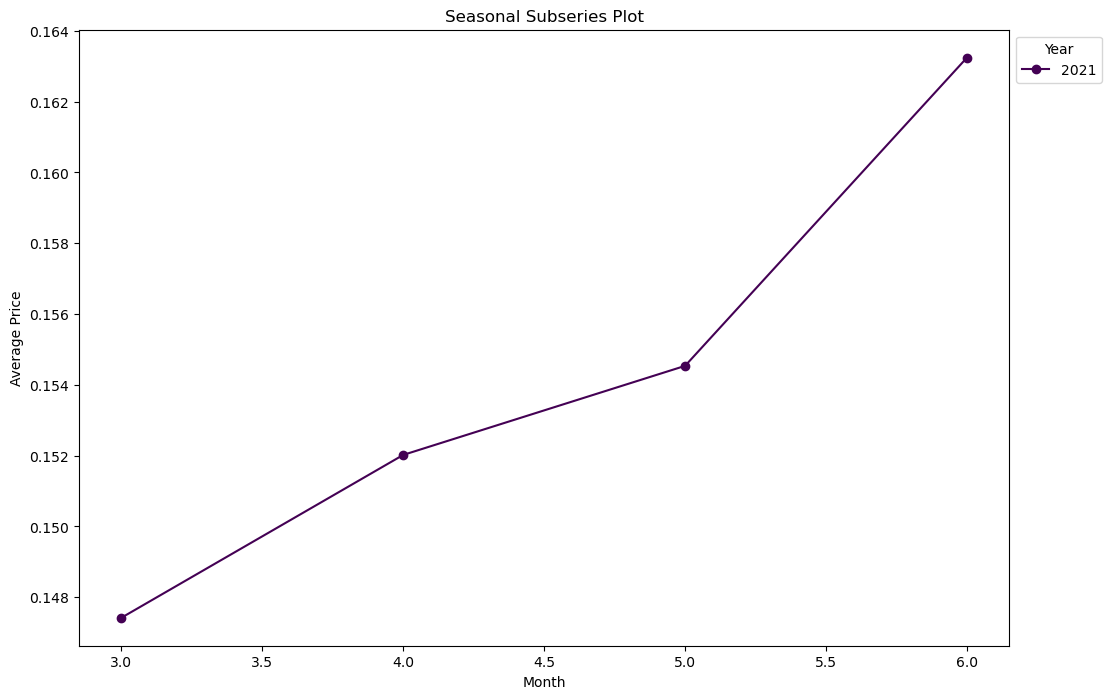

In [12]:
# Assuming your data has a 'DateTime' index, adjust as needed
df['Year'] = df.index.year
df['Month'] = df.index.month

# Create a pivot table for the subseries plot
pivot_df = df.pivot_table(values='Price', index='Month', columns='Year', aggfunc='mean')

# Plotting the seasonal subseries plot
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(pivot_df.columns)))

for i, year in enumerate(pivot_df.columns):
    plt.plot(pivot_df.index, pivot_df[year], label=str(year), color=colors[i], marker='o')

plt.title('Seasonal Subseries Plot')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.legend(title='Year', bbox_to_anchor=(1, 1))
plt.show()


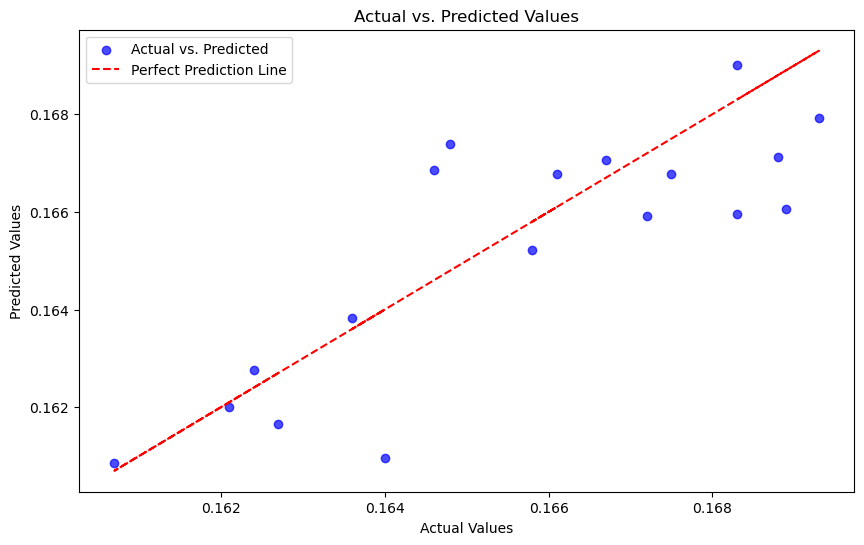

In [13]:
# Scatter Plot of Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(test['Price'], predictions, color='blue', label='Actual vs. Predicted', alpha=0.7)
plt.plot(test['Price'], test['Price'], color='red', linestyle='--', label='Perfect Prediction Line')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

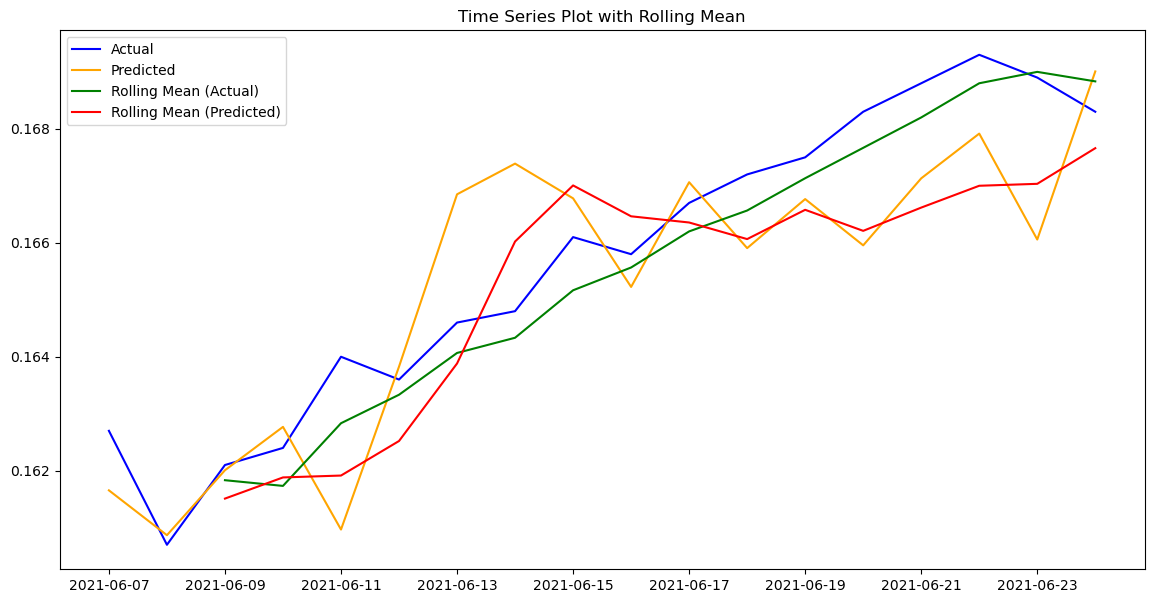

In [14]:
# Time Series Plot with Rolling Mean
plt.figure(figsize=(14, 7))
plt.plot(test.index, test['Price'], label='Actual', color='blue')
plt.plot(predictions.index, predictions, label='Predicted', color='orange')
rolling_mean_actual = test['Price'].rolling(window=3).mean()
plt.plot(test.index, rolling_mean_actual, label='Rolling Mean (Actual)', color='green')
rolling_mean_predicted = predictions.rolling(window=3).mean()
plt.plot(predictions.index, rolling_mean_predicted, label='Rolling Mean (Predicted)', color='red')
plt.legend(loc='upper left')
plt.title('Time Series Plot with Rolling Mean')
plt.show()
